In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/My Drive/PPW/report/tugas_ppw/hasil_prepros.csv")
df.head(5)

,judul,tanggal,isi,kategori,cleansing,case_folding,tokenize,stopword_removal
0,Potret Cantik Enzy Storia Saat Kulineran di Pa...,"Rabu, 25 Sep 2024 22:00 WIB",Jakarta - Enzy Storia banjir pujian setelah ta...,Makanan,Jakarta Enzy Storia banjir pujian setelah tam...,jakarta enzy storia banjir pujian setelah tam...,"['jakarta', 'enzy', 'storia', 'banjir', 'pujia...",jakarta enzy storia banjir pujian tampil paris...
1,Potret Mesra Sahrul Gunawan Saat Kulineran Bar...,"Rabu, 25 Sep 2024 21:00 WIB",Jakarta - Sahrul Gunawan dan istri gagal punya...,Makanan,Jakarta Sahrul Gunawan dan istri gagal punya ...,jakarta sahrul gunawan dan istri gagal punya ...,"['jakarta', 'sahrul', 'gunawan', 'dan', 'istri...",jakarta sahrul gunawan istri gagal anak mencob...
2,Ditegur Staf Restoran Gegara Bawa Makanan dari...,"Rabu, 25 Sep 2024 19:30 WIB",Jakarta - Seorang pengunjung restoran jadi sak...,Makanan,Jakarta Seorang pengunjung restoran jadi saks...,jakarta seorang pengunjung restoran jadi saks...,"['jakarta', 'seorang', 'pengunjung', 'restoran...",jakarta pengunjung restoran saksi mata keribut...
3,Unik! Burger Ini Isinya Kepiting Utuh Berukura...,"Rabu, 25 Sep 2024 19:00 WIB",Jakarta - Biasanya burger berisi patty atau da...,Makanan,Jakarta Biasanya burger berisi patty atau dag...,jakarta biasanya burger berisi patty atau dag...,"['jakarta', 'biasanya', 'burger', 'berisi', 'p...",jakarta burger berisi patty daging sapi bundar...
4,"Qobe Mie: Sensasi Mie Pedas Baru di Bogor, Lar...","Rabu, 25 Sep 2024 18:41 WIB",Jakarta - Ingin coba menikmati sensasi lezat m...,Makanan,Jakarta Ingin coba menikmati sensasi lezat mi...,jakarta ingin coba menikmati sensasi lezat mi...,"['jakarta', 'ingin', 'coba', 'menikmati', 'sen...",jakarta coba menikmati sensasi lezat mie pedas...


In [ ]:
#mengubah data text ke numerik
from sklearn.preprocessing import LabelEncoder

# Transformasi data kategorik
label_encoder = LabelEncoder()
df.loc[:, 'kategori_encoded'] = label_encoder.fit_transform(df['kategori'])

# Menampilkan nilai sebelum dan sesudah konversi
print("\nNilai sebelum dan sesudah konversi:")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

print("\nDataFrame setelah Label Encoding:")
print(df)



Nilai sebelum dan sesudah konversi:
{'Makanan': 0, 'Travel': 1}

DataFrame setelah Label Encoding:
                                                judul  \
0   Potret Cantik Enzy Storia Saat Kulineran di Pa...   
1   Potret Mesra Sahrul Gunawan Saat Kulineran Bar...   
2   Ditegur Staf Restoran Gegara Bawa Makanan dari...   
3   Unik! Burger Ini Isinya Kepiting Utuh Berukura...   
4   Qobe Mie: Sensasi Mie Pedas Baru di Bogor, Lar...   
..                                                ...   
95       Kisah Istana Ajaib Bhre Wengker di Mojokerto   
96                                    Title Not Found   
97  Potret Skydeck Sarinah, Spot Baru dengan Panor...   
98  Noda Kopi di Paspor Bikin Turis Australia Gaga...   
99       Adu Gemas Moo Deng VS Pesto, Mana Favoritmu?   

                          tanggal  \
0     Rabu, 25 Sep 2024 22:00 WIB   
1     Rabu, 25 Sep 2024 21:00 WIB   
2     Rabu, 25 Sep 2024 19:30 WIB   
3     Rabu, 25 Sep 2024 19:00 WIB   
4     Rabu, 25 Sep 2024 18:41 

In [ ]:
# Menyimpan DataFrame ke file CSV
df.to_csv('teks sudah bersih.csv', index=False)

# **Split Data**

In [ ]:
#membagi data train&test
from sklearn.model_selection import train_test_split

# Split data
x = df['stopword_removal'] #fitur (input)
y = df['kategori_encoded'] #target (output)

print(x)
print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

print("="*50)
print("Jumlah data latih:", len(x_train))
print("Jumlah data uji:", len(x_test))

0     jakarta enzy storia banjir pujian tampil paris...
1     jakarta sahrul gunawan istri gagal anak mencob...
2     jakarta pengunjung restoran saksi mata keribut...
3     jakarta burger berisi patty daging sapi bundar...
4     jakarta coba menikmati sensasi lezat mie pedas...
                            ...                        
95    mojokerto mojokerto situs bersejarah bernama s...
96                                    content not found
97    jakarta ngaku anak gaul jakarta mesti coba sky...
98    denpasar sepasang turis australia diperbolehka...
99    jakarta jagad maya dihebohkan kehadiran moo de...
Name: stopword_removal, Length: 100, dtype: object
0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: kategori_encoded, Length: 100, dtype: int64
Jumlah data latih: 80
Jumlah data uji: 20


# **TF-IDF Weighting**

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Fit dan transform pada data training
x_train_tfidf = tfidf.fit_transform(x_train)

# Mendapatkan nama fitur dari TF-IDF
feature_names = tfidf.get_feature_names_out()

# Konversi TF-IDF hasil training ke DataFrame
df_train_tfidf = pd.DataFrame(x_train_tfidf.toarray(), columns=feature_names)

df_train_tfidf


,aati,abad,abadi,abaikan,abang,abbey,abboud,abdurrahman,abu,acar,...,yunani,yusuf,zaim,zaman,zamannya,ziarah,zona,zone,zoo,zuleima
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.045575,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
76,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
77,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.268050,0.0,0.0,0.0,0.0,0.0,0.0
78,0.0,0.033641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.027006,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Ubah nilai TF-IDF di bawah 0.5 menjadi 0, dan di atas atau sama dengan 0.5 menjadi 1
df_train_tfidf_binary = df_train_tfidf.apply(lambda col: col.map(lambda x: 1 if x >= 0.5 else 0))

# Menampilkan DataFrame dengan nilai biner
df_train_tfidf_binary

,aati,abad,abadi,abaikan,abang,abbey,abboud,abdurrahman,abu,acar,...,yunani,yusuf,zaim,zaman,zamannya,ziarah,zona,zone,zoo,zuleima
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Membuat graf berdasarkan co-occurrence fitur
G = nx.Graph()

# Menambahkan node ke graf
for feature in df_train_tfidf_binary.columns:
    G.add_node(feature)

# Menambahkan edge berdasarkan co-occurrence
for i in range(len(df_train_tfidf_binary)):
    features = df_train_tfidf_binary.iloc[i]
    active_features = features[features == 1].index.tolist()

    for j in range(len(active_features)):
        for k in range(j + 1, len(active_features)):
            G.add_edge(active_features[j], active_features[k])

# Hitung degree centrality
degree_centrality = nx.degree_centrality(G)

# Konversi hasil degree centrality ke DataFrame untuk lebih mudah dilihat
df_degree_centrality = pd.DataFrame(degree_centrality.items(), columns=['Node', 'Degree Centrality'])

# Mengurutkan DataFrame dari yang terbesar sampai terkecil
df_degree_centrality_sorted = df_degree_centrality.sort_values(by='Degree Centrality', ascending=False)

# Tampilkan hasil degree centrality yang sudah diurutkan
print(df_degree_centrality_sorted)

                 Node  Degree Centrality
705           content           0.000445
1263            found           0.000445
2977              not           0.000445
4172         terkutuk           0.000222
1999           komang           0.000222
...               ...                ...
1509  imagesprasenjit           0.000000
1510          imazins           0.000000
1511            imbas           0.000000
1512         imbasnya           0.000000
4499          zuleima           0.000000

[4500 rows x 2 columns]


In [ ]:
# Menghapus fitur di bawah top 10 terbaik
top_10_features = df_degree_centrality_sorted.head(10)['Node'].tolist()
filtered_df_train_tfidf_binary = df_train_tfidf_binary[top_10_features]

# Tampilkan hasil DataFrame yang sudah difilter
print("\nDataFrame setelah menghapus fitur di bawah top 10:")
print(filtered_df_train_tfidf_binary)


DataFrame setelah menghapus fitur di bawah top 10:
    content  found  not  terkutuk  komang  roll  pizza  qobe  pin  hamil
0         0      0    0         0       0     0      0     0    0      0
1         0      0    0         0       0     0      0     0    0      0
2         0      0    0         0       0     0      0     0    0      0
3         0      0    0         0       0     0      0     0    0      0
4         0      0    0         0       0     1      0     0    0      0
..      ...    ...  ...       ...     ...   ...    ...   ...  ...    ...
75        0      0    0         0       0     0      0     0    0      0
76        0      0    0         0       0     0      0     0    0      0
77        0      0    0         0       0     0      0     0    0      0
78        0      0    0         0       0     0      0     0    0      0
79        0      0    0         0       0     0      0     0    0      0

[80 rows x 10 columns]


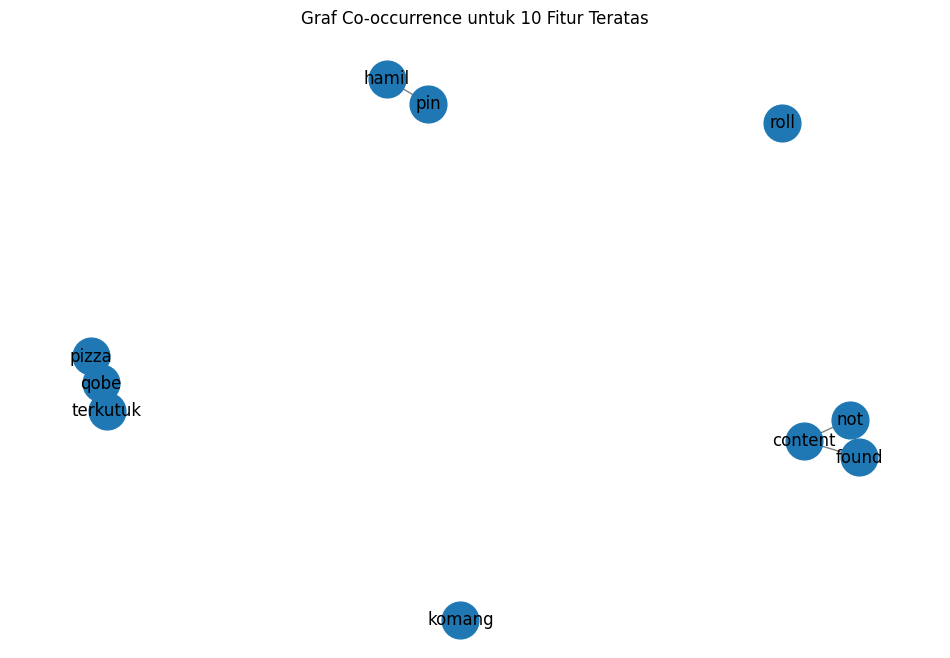

In [ ]:
import matplotlib.pyplot as plt

# Membuat graf baru hanya untuk fitur teratas
G_top_10 = nx.Graph()

# Menambahkan node teratas ke graf
for feature in top_10_features:
    G_top_10.add_node(feature)

# Menambahkan edge berdasarkan co-occurrence dari fitur teratas
for i in range(len(df_train_tfidf_binary)):
    features = df_train_tfidf_binary.iloc[i]
    active_features = features[features == 1].index.tolist()
    active_top_10_features = [f for f in active_features if f in top_10_features]

    for j in range(len(active_top_10_features)):
        for k in range(j + 1, len(active_top_10_features)):
            G_top_10.add_edge(active_top_10_features[j], active_top_10_features[k])

# Mengatur ukuran figure untuk visualisasi graf
plt.figure(figsize=(12, 8))

# Menggambar graf fitur teratas
pos = nx.spring_layout(G_top_10)  # Menggunakan layout spring
nx.draw_networkx_nodes(G_top_10, pos, node_size=700)  # Menggambar node
nx.draw_networkx_edges(G_top_10, pos, width=1.0, alpha=0.5)  # Menggambar edge
nx.draw_networkx_labels(G_top_10, pos, font_size=12, font_family='sans-serif')  # Menggambar label

# Menampilkan graf
plt.title('Graf Co-occurrence untuk 10 Fitur Teratas')
plt.axis('off')  # Menyembunyikan sumbu
plt.show()

In [ ]:
# Menghitung closeness centrality
closeness_centrality = nx.closeness_centrality(G_top_10)

# Menghitung betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G_top_10)

# Konversi hasil centrality ke DataFrame untuk lebih mudah dilihat
df_closeness_centrality = pd.DataFrame(closeness_centrality.items(), columns=['Node', 'Closeness Centrality'])
df_betweenness_centrality = pd.DataFrame(betweenness_centrality.items(), columns=['Node', 'Betweenness Centrality'])

# Menggabungkan semua centrality ke dalam satu DataFrame
df_centrality = pd.merge(df_degree_centrality_sorted, df_closeness_centrality, on='Node')
df_centrality = pd.merge(df_centrality, df_betweenness_centrality, on='Node')

# Menampilkan hasil centrality
print(df_centrality)

       Node  Degree Centrality  Closeness Centrality  Betweenness Centrality
0   content           0.000445              0.222222                     0.0
1     found           0.000445              0.222222                     0.0
2       not           0.000445              0.222222                     0.0
3  terkutuk           0.000222              0.111111                     0.0
4    komang           0.000222              0.000000                     0.0
5      roll           0.000222              0.000000                     0.0
6     pizza           0.000222              0.111111                     0.0
7      qobe           0.000222              0.000000                     0.0
8       pin           0.000222              0.111111                     0.0
9     hamil           0.000222              0.111111                     0.0


# **Ke 2 Mengambil 1 Berita**

In [ ]:
# Mengimpor library yang diperlukan
import pandas as pd

# Teks berita yang telah dirapikan
news_text_1 = """surabaya surabaya kuliner legendaris eksis salah satunya sate karak berbahan jeroan sapi dibumbui rempah taburan serundeng nikmat sate karak konon
populer an sate berasal kawasan sunan ampel utara kota surabaya bahan utama sate karak jeroan sapi usus dibumbui rempahrempah disajikan ketan hitam pengganti nasi
bumbunya memiliki keunikan dibandingkan bumbu sate dilengkapi serundeng taburan bubuk kedelai cita pedas sate karak dikenalkan kali masyarakat wilayah ampel proses
memasak sederhana teliti sate karak memiliki khas menggoda selera sate disajikan nasi sambal pelengkap menambah kenikmatan disantap sate karak dinikmati sarapan
bumbu kacang sate nikmat aroma arang asap kuat terbiasa menikmati sate tambahan bumbu kacang unik sedap sate karak asli satusatunya ampel surabaya foto esti
widiyanadetikcom detikers makan merogoh kocek rp mencoba sate karak legendaris makan sate karak ketan menggantinya nasi jenis menu pilihan nasi sate daging
dijual rp ribu porsi pilihan tusuk sate daging tusuk sate jeroan masingmasing harganya rp ribu sate karak dinikmati langsung jalan ampel lonceng no ampel
kecamatan semampir kota surabaya jawa timur warung sate karak buka wib wib pengunjung merasakan kenikmatan ditawarkan wawancara detikjatim terungkap warung sate karak
jalan ampel lonceng dikelola generasi ketiga ellis romlah cucu pendiri sate karak sate karak kali didirikan nenek penjajahan belanda diteruskan sebentar melanjutkannya
satusatunya ampel ellis detikcom selasa sate kerak favoritnya masyarakat keturunan arab tinggal ampel foto esti widiyanadetikcom namanya gitu nasi karak nasi basi yg
dikeringkan ketan item setelannya jodohnya sate menang ketan gitu gitu gitu sate karak langganan kesukaan masyarakat keturunan arab tinggal ampel menjual satusatunya
artikel ditulis sri rahayu peserta magang bersertifikat kampus merdeka detikcom artikel tayang detikjatim judul mencicipi sate karak kuliner legendaris khas ampel surabaya aqradr"""

news_text_2 = """ jakarta nikita mirzani aktif mengunggah konten kuliner youtube kali menyambangi makan bakso enak makan viral direkomendasikan netizen momennya
nikita mirzani sorotan publik terkait penjemputan anaknya lolly hubungan harmonis nikita mirzani pasang badan membawa lolly aman terlepas sosok nikita mirzani
disukai publik kontenkonten kulinernya seru unggahan youtube crazy nikmir real momen anak mencicipi aneka kuliner enak videonya populer ditonton juta kali momen
nikita mirzani makan bakso enak cicip pangsit viral antre bubur ayam gerobakan momen kuliner nikita mirzani ditonton youtube mukbang bakso porsi nikita mirzani
mengunggah momen makan rumah pandemi covid menyuguhkan sepanci bakso berisi porsi mukbang baksonya bakso bakso tetelan wanita pelengkap mie kuning mie putih
sawi hijau lupa sambal saus cabai nggak kecap pantang nikita mirzani mukbang nikita mirzani ditemani teman prianya meracik semangkuk bakso cuka sambal mukbang
bakso rumah videonya sukses ditonton juta kali berita ditulis cicip bakso ncess nabati foto youtube crazy nikmir real penggemar bakso nikita mirzani melewatkan
makan bakso enak mengunggah momennya mampir warung bakso milik artis ncess nabati tegal parang videonya ditonton juta kali nikita mirzani sidak dapur mengecek
kebersihan sajian bakso memuji bakso enak porsi melimpah pedasnya sambal endulll nikita tetelan bakso dilengkapi daging tulang kenikmatan bakso dipuji sahabat
nikita mirzani fitri salhuteru bercucuran keringat makan nasi tempong bali foto youtube crazy nikmir real video kulineran nikita mirzani ditonton makan nasi
tempong bali diunggah juni videonya disaksikan juta kali mampir nasi tempong indra beralamat jl dewi sri no legian nikita mirzani pesan nasi tempong lauk
ikan gurame ati langsung mencocol lauk sambal tempong terkenal pedas nonjok nikita mirzani sambal pedasnya mainmain bilang efek pedasnya otak ibunda lolly
merekomendasikan followersnya cicip nasi tempong bali selengkapnya halaman halaman
"""

# Mengubah teks menjadi DataFrame
data = pd.DataFrame([news_text_1, news_text_2], columns=['text'])

# Menampilkan DataFrame
print(data)


                                                text
0  surabaya surabaya kuliner legendaris eksis sal...
1   jakarta nikita mirzani aktif mengunggah konte...


In [ ]:
# Mengimpor library yang diperlukan
from sklearn.feature_extraction.text import TfidfVectorizer

# Menghitung TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data['text'])

# Mengambil nama fitur (kata) dari TF-IDF
feature_names = tfidf_vectorizer.get_feature_names_out()

# Menghitung skor TF-IDF untuk setiap fitur
tfidf_scores = tfidf_matrix.toarray()
df_tfidf_scores = pd.DataFrame(tfidf_scores, columns=feature_names)

# Mengurutkan DataFrame berdasarkan skor TF-IDF dari terbesar ke terkecil
df_top_features = df_tfidf_scores.sum(axis=0).reset_index()
df_top_features.columns = ['Feature', 'Score']

# Pastikan kolom 'Score' adalah tipe data numerik
df_top_features['Score'] = pd.to_numeric(df_top_features['Score'], errors='coerce')

# Mengurutkan berdasarkan skor
df_top_features = df_top_features.sort_values(by='Score', ascending=False)

# Mengambil 10 fitur terbaik
top_10_features = df_top_features.head(10)

# Menampilkan 10 fitur terbaik
print("10 Fitur Terbaik:\n", top_10_features)


10 Fitur Terbaik:
       Feature     Score
231      sate  0.687800
20      bakso  0.460160
187    nikita  0.460160
109     karak  0.449715
176   mirzani  0.431400
2       ampel  0.264538
182      nasi  0.215248
144     makan  0.180885
261   tempong  0.172560
254  surabaya  0.158723


In [ ]:
# Mengimpor library yang diperlukan
from sklearn.metrics.pairwise import cosine_similarity

# Mengambil hanya nama fitur dari 10 fitur teratas
top_10_feature_names = top_10_features['Feature'].values

# Mengambil indeks fitur di vocabulary
top_10_feature_indices = [tfidf_vectorizer.vocabulary_[feature] for feature in top_10_feature_names]

# Mengambil kolom TF-IDF untuk 10 fitur teratas
top_10_tfidf_matrix = tfidf_matrix[:, top_10_feature_indices]

# Menghitung cosine similarity
cosine_sim = cosine_similarity(top_10_tfidf_matrix.T)

# Mengubah hasil cosine similarity menjadi DataFrame untuk kemudahan analisis
cosine_sim_df = pd.DataFrame(cosine_sim, index=top_10_feature_names, columns=top_10_feature_names)

# Menampilkan cosine similarity
print("Cosine Similarity Matrix:\n", cosine_sim_df)

Cosine Similarity Matrix:
               sate     bakso    nikita     karak   mirzani     ampel  \
sate      1.000000  0.000000  0.000000  1.000000  0.000000  1.000000   
bakso     0.000000  1.000000  1.000000  0.000000  1.000000  0.000000   
nikita    0.000000  1.000000  1.000000  0.000000  1.000000  0.000000   
karak     1.000000  0.000000  0.000000  1.000000  0.000000  1.000000   
mirzani   0.000000  1.000000  1.000000  0.000000  1.000000  0.000000   
ampel     1.000000  0.000000  0.000000  1.000000  0.000000  1.000000   
nasi      0.741086  0.671410  0.671410  0.741086  0.671410  0.741086   
makan     0.254173  0.967159  0.967159  0.254173  0.967159  0.254173   
tempong   0.000000  1.000000  1.000000  0.000000  1.000000  0.000000   
surabaya  1.000000  0.000000  0.000000  1.000000  0.000000  1.000000   

              nasi     makan   tempong  surabaya  
sate      0.741086  0.254173  0.000000  1.000000  
bakso     0.671410  0.967159  1.000000  0.000000  
nikita    0.671410  0.96715

In [ ]:
# Menambahkan klasifikasi berdasarkan nilai cosine similarity
classification = (cosine_sim_df >= 0.5).astype(int)

# Menampilkan DataFrame klasifikasi
print("\nClassification Matrix:\n", classification)



Classification Matrix:
           sate  bakso  nikita  karak  mirzani  ampel  nasi  makan  tempong  \
sate         1      0       0      1        0      1     1      0        0   
bakso        0      1       1      0        1      0     1      1        1   
nikita       0      1       1      0        1      0     1      1        1   
karak        1      0       0      1        0      1     1      0        0   
mirzani      0      1       1      0        1      0     1      1        1   
ampel        1      0       0      1        0      1     1      0        0   
nasi         1      1       1      1        1      1     1      1        1   
makan        0      1       1      0        1      0     1      1        1   
tempong      0      1       1      0        1      0     1      1        1   
surabaya     1      0       0      1        0      1     1      0        0   

          surabaya  
sate             1  
bakso            0  
nikita           0  
karak            1  
mirzani    

In [ ]:
# Membuat graf dari matriks klasifikasi
G = nx.from_pandas_adjacency(classification)

# Menghitung degree
degree = dict(G.degree())
print("\nDegree:\n", degree)

# Menghitung closeness centrality
closeness = nx.closeness_centrality(G)
print("\nCloseness Centrality:\n", closeness)

# Menghitung betweenness centrality
betweenness = nx.betweenness_centrality(G)
print("\nBetweenness Centrality:\n", betweenness)


Degree:
 {'sate': 6, 'bakso': 7, 'nikita': 7, 'karak': 6, 'mirzani': 7, 'ampel': 6, 'nasi': 11, 'makan': 7, 'tempong': 7, 'surabaya': 6}

Closeness Centrality:
 {'sate': 0.6428571428571429, 'bakso': 0.6923076923076923, 'nikita': 0.6923076923076923, 'karak': 0.6428571428571429, 'mirzani': 0.6923076923076923, 'ampel': 0.6428571428571429, 'nasi': 1.0, 'makan': 0.6923076923076923, 'tempong': 0.6923076923076923, 'surabaya': 0.6428571428571429}

Betweenness Centrality:
 {'sate': 0.0, 'bakso': 0.0, 'nikita': 0.0, 'karak': 0.0, 'mirzani': 0.0, 'ampel': 0.0, 'nasi': 0.5555555555555556, 'makan': 0.0, 'tempong': 0.0, 'surabaya': 0.0}


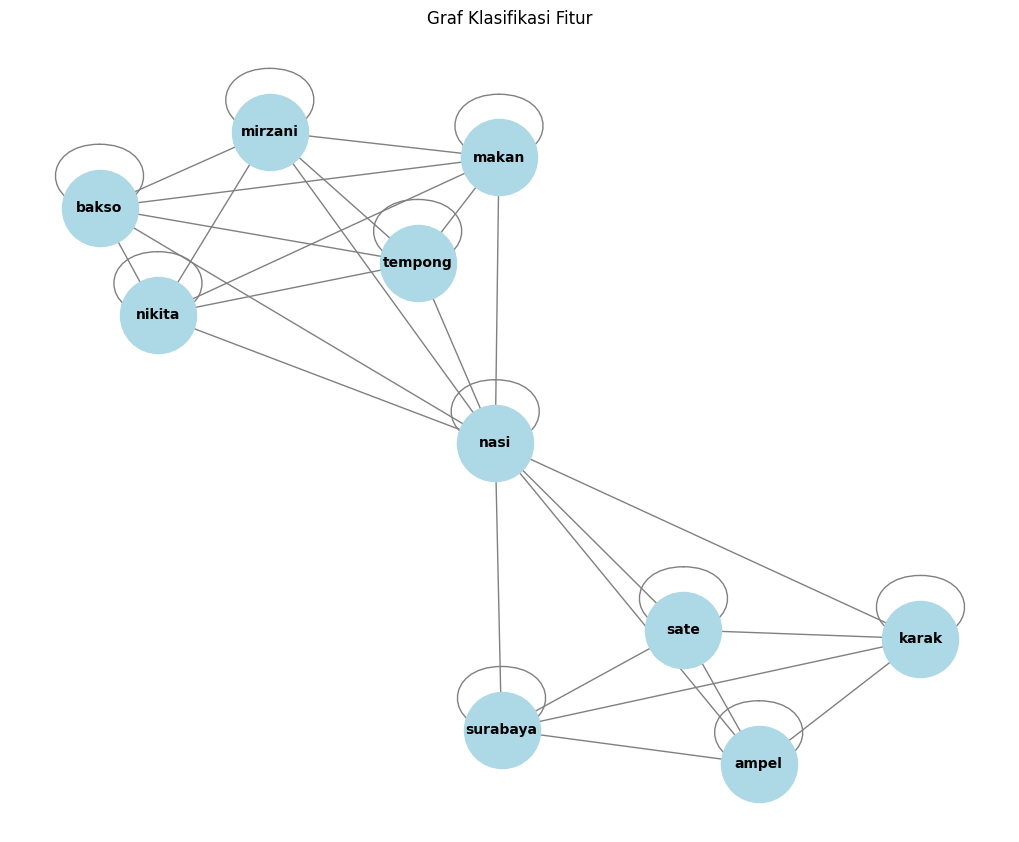

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Mengubah hasil cosine similarity menjadi DataFrame untuk kemudahan analisis
cosine_sim_df = pd.DataFrame(cosine_sim, index=top_10_feature_names, columns=top_10_feature_names)

# Menambahkan klasifikasi berdasarkan nilai cosine similarity
classification = (cosine_sim_df >= 0.5).astype(int)

# Membuat graf dari matriks klasifikasi
G = nx.from_pandas_adjacency(classification)

# Menggambar graf
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Menggunakan spring layout untuk penempatan node
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10, font_weight='bold')
plt.title("Graf Klasifikasi Fitur")
plt.show()
